              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2816
        True       0.02      0.12      0.03        85

    accuracy                           0.80      2901
   macro avg       0.49      0.47      0.46      2901
weighted avg       0.94      0.80      0.86      2901



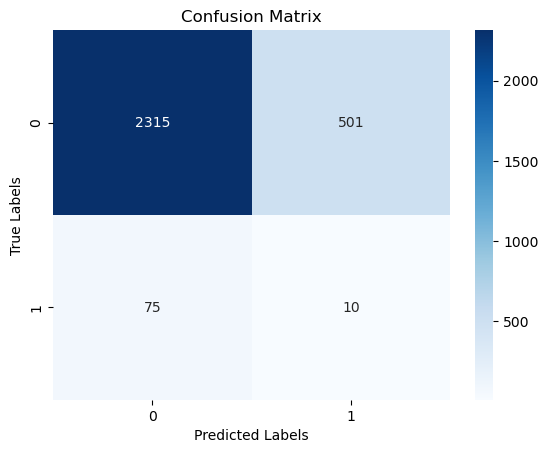

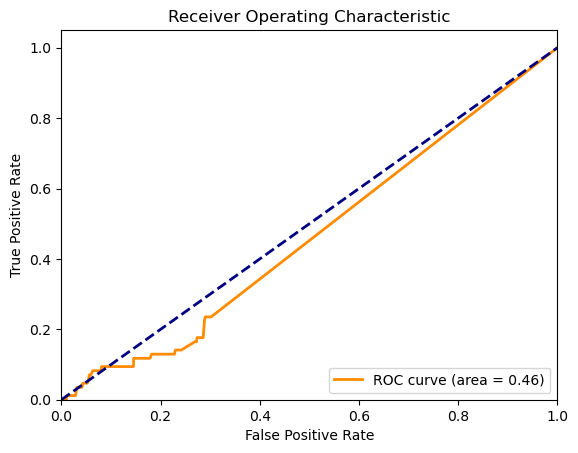

{'Logistic Regression': 0.0,
 'Random Forest': 0.0,
 'SVM': 0.0,
 'Gradient Boosting': 0.0}

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#HYPOTHESIS: DAILY LISTENING HABIT OF MINE MATCHES THE SONGS IN MY PLAYLISTS.

# Feature hashing
hasher = FeatureHasher(n_features=20, input_type='string')
hashed_features = hasher.transform(UniqueSearchHistory[['trackName', 'artistName']].astype(str).values)

# Create the target variable
UniqueSearchHistory['in_playlist'] = UniqueSearchHistory.apply(
    lambda row: any((all_playlists_data['trackName'] == row['trackName']) & (all_playlists_data['artistName'] == row['artistName'])), 
    axis=1
)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(hashed_features, UniqueSearchHistory['in_playlist'], test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier())
]


#CONCLUSION: IT CAN BE SEEN FROM CONFUSION MATRIX THAT MY HYPOTHESIS IS HAVE HIGH PERCENTAGE OF CORRECTNESS ACCORDING TO THE MODELING.
